ДЗ1 Фролов Алексей.


 **Многомерная линейная регрессия из sklearn**

Применим многомерную регрессию из sklearn для стандартного датасета


In [ ]:
#@title Текст заголовка по умолчанию


import numpy as np



from sklearn.datasets import make_regression

X, y = make_regression(n_samples = 10000)
print(X.shape, y.shape)



(10000, 100) (10000,)


У нас 10000 объектов и 100 признаков. Для начала решим задачу аналитически "из коробки".

In [ ]:


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit(X, y)
print(mean_squared_error(y, reg.predict(X)))
reg.coef_



1.3918957353034255e-25


array([-9.00602981e-15, -3.15303339e-14, -4.61852778e-14,  7.74935671e-14,
        6.59472477e-14, -3.28626015e-14, -7.10542736e-15, -6.21724894e-15,
        2.81302759e-14,  2.33270088e+00,  5.77315973e-15,  5.58735527e+01,
        6.83897383e-14,  3.19744231e-14,  2.44249065e-14, -8.57092175e-14,
       -3.01980663e-14,  6.39488462e-14,  3.19744231e-14,  3.37507799e-14,
       -5.28466160e-14,  5.32907052e-15, -3.55271368e-15, -3.90798505e-14,
        1.42108547e-14,  2.13162821e-14,  2.30926389e-14,  3.10862447e-15,
       -4.81836793e-14,  2.93098879e-14,  3.55271368e-15, -1.11022302e-14,
        7.10542736e-15,  2.39808173e-14, -1.77635684e-15,  7.99360578e-15,
        3.73034936e-14,  8.88178420e-15, -3.55271368e-15, -8.88178420e-16,
       -3.90798505e-14, -3.37507799e-14, -2.53130850e-14,  6.03056839e+01,
        2.48689958e-14,  1.03028697e-13, -1.06581410e-14,  1.06581410e-14,
       -3.28626015e-14, -2.13162821e-14,  5.32907052e-14,  9.99401350e+01,
        3.50498746e+01, -



Теперь попробуем обучить линейную регрессию методом градиентного спуска "из коробки"


In [ ]:


from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(alpha=0.00000001).fit(X, y)
print(mean_squared_error(y, reg.predict(X)))
reg.coef_



3.770178640896608e-12


array([-1.78626476e-08,  4.89130736e-08,  4.16179493e-08,  4.51224959e+01,
        8.39503646e-08,  2.38385324e-08, -2.50803172e-08, -5.42688475e-08,
       -3.94684021e-08, -2.21780400e-08,  2.28895983e-08,  1.01805705e-08,
       -1.29749407e-08,  5.53193325e-08, -3.17167319e-08,  4.55024554e-08,
       -3.09117785e-08,  9.74555349e+01,  4.27924970e+01,  8.00603436e-09,
        5.25494517e+01, -3.11580478e-08, -2.27147737e-08,  1.87786632e+01,
       -1.59215153e-08, -7.69658512e-08, -3.61664520e-09,  4.55205434e-08,
       -4.09015477e-08, -3.66464413e-08, -2.29807409e-10,  1.32910313e-08,
       -8.31691816e-09, -2.31859061e-08,  2.13611506e-08,  1.62698621e-08,
       -5.51370483e-09,  8.95757832e+01, -2.67280554e-09,  2.46490022e-08,
        2.93450133e-08, -4.11727791e-09, -3.05380198e-08, -3.53823630e-08,
        4.95133294e-10,  3.31874899e-08,  4.77013237e-08,  4.94617344e-09,
        2.17281711e-08,  4.82716299e-08, -2.85856336e-08, -5.09274558e-09,
        4.50661956e-08,  

[Текст ссылки](https:// [Текст ссылки](https:// [Текст ссылки](https:// [Текст ссылки](https:// [Текст ссылки](https://)))))# **Задание 1**
Как мы видим, функция Стохастического Градиентного спуска работает немного хуже, чем обычная линейная регрессия (зато куда быстрее). Значение ошибки в метрике mean_squared_error у линейной регрессии порядок e-25, у SGDRegressor-а ошибка больше: порядка e-12. В чем причина? Стохастический спуск правильно идет к минимуму, но на каждой операции он менее точен, чем обычный градиентный спуск. Поэтому после одинакового количества итераций в момент у стохастического спуска ошибка будет больше, чем у обычного, как видно на картинке ниже:

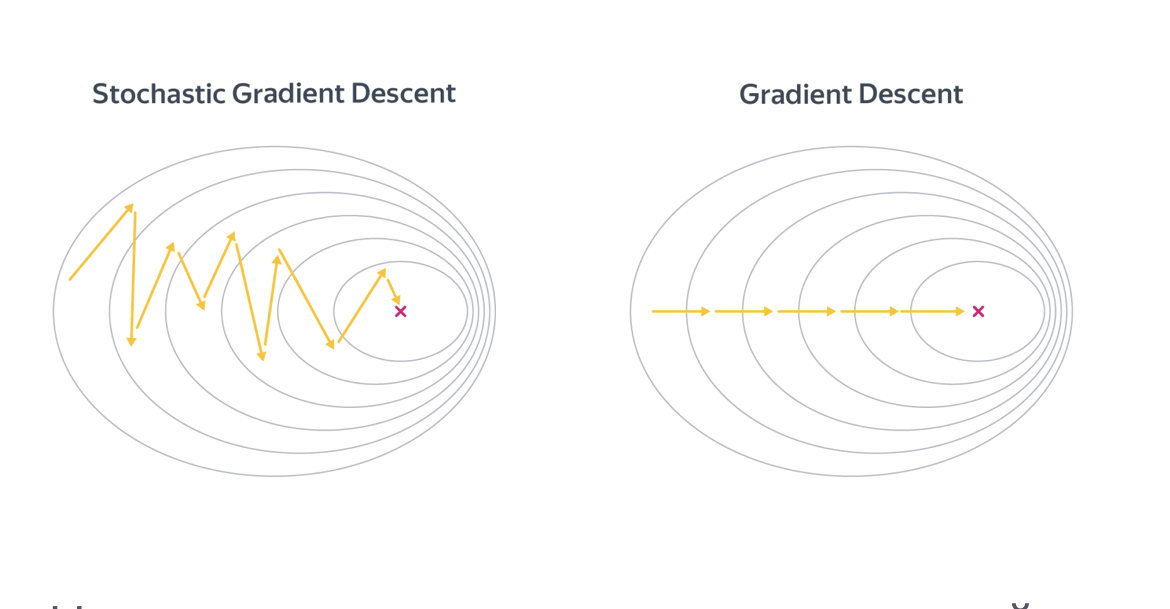

# **Задание 2**
Если "поиграться" с гиперпараметрами, точность модели можно повысить. Например, если поставить alpha = 0.0000000000000001, а число итераций 20000, то точность двух моделей (Стохастического градиентного спуска и линейной регрессии) будет примерно одинаковой порядка e-25, как видно ниже:

In [ ]:

from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(alpha=0.0000000000000001, max_iter = 20000).fit(X, y)
print(mean_squared_error(y, reg.predict(X)))
reg.coef_



2.121395408752247e-25


array([-8.61217794e-15,  8.71333839e-15, -4.17326161e-15,  4.51224963e+01,
        9.93612329e-15, -1.02915379e-14, -2.16503545e-15,  3.11317681e-15,
       -6.63749554e-16, -1.43491422e-14, -2.55607839e-15, -5.95766534e-15,
       -4.32750556e-15,  6.15960771e-15, -1.21092354e-14, -4.84671873e-16,
       -1.24311887e-14,  9.74555359e+01,  4.27924974e+01, -1.39197127e-14,
        5.25494522e+01,  2.36319206e-15, -1.22642214e-14,  1.87786633e+01,
       -2.99433209e-15,  9.76317263e-15,  4.66514718e-15,  7.85950940e-15,
        2.46854913e-14,  1.42904242e-14, -5.18360414e-15,  1.12326807e-14,
       -1.40670336e-15, -6.02758296e-15,  6.73066247e-15,  4.89404947e-15,
        8.51025603e-15,  8.95757841e+01,  4.95258746e-15,  1.29833562e-14,
        1.01818796e-14,  1.65194237e-14,  5.04872848e-15,  2.83615602e-15,
       -7.37957094e-16,  6.73483488e-15,  1.56055374e-14, -1.45349203e-14,
        1.41083063e-14,  3.51185778e-15, -1.85580293e-15, -7.65419497e-15,
        1.18008876e-14,  


Ваша многомерная линейная регрессия

# **Задание 3 (4 балла).**
Напишите собственную многомерную линейную регрессию, оптимизирующую MSE методом градиентного спуска*. Для этого используйте шаблонный класс.

Критерий останова: либо норма разности весов на текущей и предыдущей итерациях меньше определенного значения (первый и третий варианты), либо модуль разности функционалов качества (MSE) на текущей и предыдущей итерациях меньше определенного значения (второй и четвертый варианты). Также предлагается завершать обучение в любом случае, если было произведено слишком много итераций.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.externals._packaging.version import Infinity

class LinearRegression(object):
    def __init__(self, alpha=0.1, l_ratio=0.001, tol=0.000001, max_iter=10000):
        '''
        Для начала необходимо инициализировать параметры
        alpha - это learning rate или шаг обучения
        l_ratio - параметр регуляризации
      tol - значение для критерия останова
        max_iter - максимальное количество итераций обучения
        '''

        self.alpha = alpha
        self.l_ratio = l_ratio
        self.tol = tol
        self.max_iter = max_iter
        self.vector = 0



        # your code here

    def fit(self, X, y):
        '''
        Метод для обучения линейной регрессии
        X - матрица признаков
        y - вектор правильных ответов
        '''

        X = np.hstack((np.ones((X.shape[0], 1)), X))

        m = X.shape[0]
        self.vector = np.random.randn(X.shape[1])
        for i in range(self.max_iter):

          y_pred = (self.vector.T@X.T).T

          exvector = self.vector  #Запоминаем вектор весов

          self.vector  = self.vector  - 2./m * self.alpha * (X.T @ ((X@self.vector ).T  - y).T) #Меняем вектор весов, уменьшая ошибку

          if sum(abs(self.vector[i] - exvector[i])**2 for i in range(len(exvector))) < self.tol: #Если вектор изменился не сильно, останавливаем

            break

          y_pred = (self.vector.T@X.T).T

          MSE = mean_squared_error(y, y_pred)

        # your code here

    def predict(self, X):
        '''
        Метод для предсказаний линейной регрессии
        X - матрица признаков
        '''

        X = np.hstack((np.ones((X.shape[0], 1)), X))

        return X @ self.vector


X, y = make_regression(n_samples = 10000)

my_reg = LinearRegression()
my_reg.fit(X, y)
assert mean_squared_error(y, my_reg.predict(X)) < 1e-3
print(mean_squared_error(y, my_reg.predict(X)))
print('You are amazing! Great work!')



1.5198002674702723e-05
You are amazing! Great work!


#**Задание 4 (2 балла)**.
Добавьте l2 регуляризацию.


In [ ]:
print('You are amazing! Great work!')

You are amazing! Great work!




#**Задание 5 (1 балл)**
Обучим линейную регрессию из коробки с l2-регуляризацией со значением параметра решуляризации 0.1.


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error


X, y = make_regression(n_samples = 10000)
ridge = Ridge(alpha=0.1, fit_intercept=True)
ridge.fit(X, y)
#ridge.intercept_, ridge.coef_
print(mean_squared_error(y, ridge.predict(X)))

1.8733504777128648e-06


P.S. Еще есть 3 сделанных дз по этому курсу на Stepik по темам: Линейные регрессии, Градиентный спуск, Линейные модел классификации-1. Задачи 6 и 7 в файле в тетрадке.